# WeatherPy
----

#### Note
* Instructions have been included for each segment to think through the steps.

In [3]:
pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 18.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675966 sha256=86dacc051ecae7fb469e920e4801e7fca270e796b13384546ede20276461fb7f
  Stored in directory: /Users/Galya/Library/Caches/pip/wheels/e9/27/5f/7defd70aaec29af33fe5e2110843e14dcfc44cba710a0dd957
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
# Create List cities to hold all city related information - List of Dictionaries {city:country}
cities = []
# List to add unique cities
only_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_data.city_name
    country = city_data.country_code
      
# If the city is unique, then add it to a our cities list
    if city not in only_cities:
        only_cities.append(city)
        cities.append({city:[country]})

# Print the city count to confirm sufficient count
print(len(cities))

613
<class 'dict'>


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Use Open Weather API to access weather data

# Get temperature in Fahrengeit
units="imperial"

# Specify the query url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# an example of request
# http://api.openweathermap.org/data/2.5/weather?appid=e177161205c800990b4bee8d53c03467&units=imperial&q=sitka

# Get All needed weather parameters for each city
print("Beginning Data Retrieval")
print("--------------------------------")

# Set data for loop - record counter and copy of cities list to iterate throuh
cities_copy = [city for city in cities]
record_id=0

# Iterate through cities copy to get weather data for each city
for city in cities_copy:

    # Get Key from city Dictionary to get the city name    
    for key in city:
        
        try:
            print(f"Processing Record {record_id} | {key}")

            # Try all required responses first
            response = requests.get(url+key).json()
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            temp = response["main"]["temp_max"]
            hum = response["main"]["humidity"]
            cld = response["clouds"]["all"]
            wind = response["wind"]["speed"]
            dt = response["dt"]

            # Add values to city dictionary
            city[key].append(lat)
            city[key].append(lng)
            city[key].append(temp)
            city[key].append(hum)
            city[key].append(cld)
            city[key].append(wind)
            city[key].append(dt)
            
        # Catch exception if data for city is not foud in openweather API   
        except:          
            print(f"City {key} not found. Skipping...")
            
            # Remove this city from cities list
            cities.remove(city)    
            
    record_id+=1
    
print("--------------------------------")        
print("Data Retrieval Complete")
print("--------------------------------")
print(len(cities))

Beginning Data Retrieval
--------------------------------
Processing Record 0 | sitka
City sitka not found. Skipping...
Processing Record 1 | kodiak
City kodiak not found. Skipping...
Processing Record 2 | piatykhatky
City piatykhatky not found. Skipping...
Processing Record 3 | posse
City posse not found. Skipping...
Processing Record 4 | grytviken
City grytviken not found. Skipping...
Processing Record 5 | redcliff
City redcliff not found. Skipping...
Processing Record 6 | connell
City connell not found. Skipping...
Processing Record 7 | puerto natales
City puerto natales not found. Skipping...
Processing Record 8 | albany
City albany not found. Skipping...
Processing Record 9 | longyearbyen
City longyearbyen not found. Skipping...
Processing Record 10 | college
City college not found. Skipping...
Processing Record 11 | waitangi
City waitangi not found. Skipping...
Processing Record 12 | west island
City west island not found. Skipping...
Processing Record 13 | adamstown
City adamsto

Processing Record 456 | nuevo progreso
Processing Record 457 | chivilcoy
Processing Record 458 | lakhtar
Processing Record 459 | sumbawa
City sumbawa not found. Skipping...
Processing Record 460 | quelimane
Processing Record 461 | leshukonskoye
Processing Record 462 | inta
Processing Record 463 | sinnamary
Processing Record 464 | san javier
Processing Record 465 | avera
Processing Record 466 | fayaoue
Processing Record 467 | tucurui
Processing Record 468 | comodoro rivadavia
Processing Record 469 | leh
Processing Record 470 | tezu
Processing Record 471 | nuuk
Processing Record 472 | toktogul
Processing Record 473 | anahuac
Processing Record 474 | vengerovo
Processing Record 475 | daru
Processing Record 476 | erzin
Processing Record 477 | inhambane
Processing Record 478 | del rio
Processing Record 479 | rocha
Processing Record 480 | sujangarh
Processing Record 481 | novyy urengoy
Processing Record 482 | davidson
Processing Record 483 | kharopon
Processing Record 484 | vao
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create an empty DataFrame with required columns
city_weather = pd.DataFrame(
    columns=["Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])

# Add data for each city into DataFrame via df.append()
for city in cities:
    
    # Create DataFrame from city Dictionary with orient=index to have key as an index     
    city_df = pd.DataFrame.from_dict(
        city,
        orient = 'index',
        columns=["Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])
  
    city_weather = city_weather.append(city_df)

city_weather.index.name = "City"

city_weather.to_csv("Output/city_weather.csv")

city_weather

,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
shasta lake,us,40.6804,-122.3708,86.72,41,100,4.23,1627282088
punta arenas,cl,-53.1500,-70.9167,35.71,87,0,11.50,1627281935
thompson,ca,55.7435,-97.8558,41.16,87,40,0.00,1627281980
nikolskoye,ru,59.7035,30.7861,75.09,40,6,4.05,1627281969
port alfred,za,-33.5906,26.8910,63.77,30,43,12.75,1627281741
...,...,...,...,...,...,...,...,...
hailar,cn,49.2000,119.7000,67.30,77,100,11.18,1627282342
nanyamba,tz,-10.6833,39.8333,75.04,43,49,11.90,1627282342
nsanje,mw,-16.9200,35.2620,66.74,69,63,7.07,1627282343


In [5]:
# convert to float
city_weather["Humidity"] = city_weather["Humidity"].astype(float)
city_weather["Cloudiness"] = city_weather["Cloudiness"].astype(float)
city_weather["Wind Speed"] = city_weather["Wind Speed"].astype(float)

# Add statistics
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,20.353277,16.849156,71.185893,68.628866,54.104811,8.017990
std,32.994342,90.922456,13.929529,21.984341,40.532314,5.488797
min,-54.800000,-179.166700,33.460000,10.000000,0.000000,0.000000
25%,-7.158600,-66.214700,62.287500,53.250000,7.000000,3.980000
50%,23.930050,22.679000,72.490000,73.000000,63.500000,6.910000
75%,49.210350,96.319175,81.615000,87.000000,97.750000,11.002500
max,78.218600,173.166700,107.620000,100.000000,100.000000,30.850000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
hum_df = pd.DataFrame(city_weather)

# If there are cities with humidity > 100 save indices
indices = []
for index, row in hum_df.iterrows():
    if hum_df.loc[index,"Humidity"]>100:
        indices.append(index)
indices

[]

In [9]:
# If such cities found drop them from DataFrame
if len(indices)>0:
    clean_df = hum_df.drop(indices, inplace = False)
else:
    clean_df = pd.DataFrame(city_weather)
clean_df

,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
shasta lake,us,40.6804,-122.3708,86.72,41.0,100.0,4.23,1627282088
punta arenas,cl,-53.1500,-70.9167,35.71,87.0,0.0,11.50,1627281935
thompson,ca,55.7435,-97.8558,41.16,87.0,40.0,0.00,1627281980
nikolskoye,ru,59.7035,30.7861,75.09,40.0,6.0,4.05,1627281969
port alfred,za,-33.5906,26.8910,63.77,30.0,43.0,12.75,1627281741
...,...,...,...,...,...,...,...,...
hailar,cn,49.2000,119.7000,67.30,77.0,100.0,11.18,1627282342
nanyamba,tz,-10.6833,39.8333,75.04,43.0,49.0,11.90,1627282342
nsanje,mw,-16.9200,35.2620,66.74,69.0,63.0,7.07,1627282343


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Get the date of analysis
analysis_date = date.today()

# Define function to adjust y_labels
def label(y_label):
    switch = {
        "Max Temperature": "Max Temperature (F)",
        "Humidity": "Humidity (%)",
        "Cloudiness": "Cloudiness (%)",
        "Wind Speed": "Wind Speed (mph)"
    }
    return switch.get(y_label)

# Define function to build a scatter plot and to save to .png file
def scatter(y_value, y_label):
    ax = clean_df.plot(kind = "scatter", x = "Lat", y = y_value,
              title = f"City Latitude vs. {y_label} ({analysis_date})",
                      marker = "o", s=35, facecolor="teal", edgecolor = "black", grid = True)
    ax.set_xlabel("Latitude")
    ax.set_ylabel(label(y_label))
    
    fig = ax.get_figure()
    fig.savefig(f"Output/Lat_{y_label}.png")

## Latitude vs. Temperature Plot

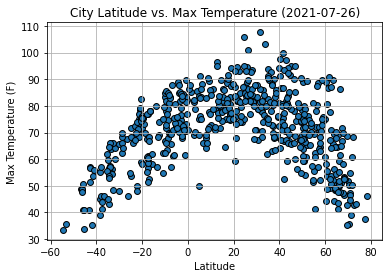

In [11]:
scatter("Max Temp", "Max Temperature")

* Latitude vs. Temperature Plot shows that there is a correlation between Latitude and Max Temperature.
* The closer the latitude to the zero the higher we might expect the Max Temperatures.
* At the current time of Analysis the Highest Temperature tend to shift towards Northern Hemisphere.

## Latitude vs. Humidity Plot

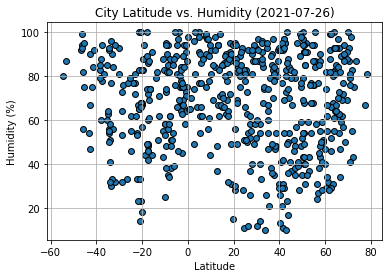

In [12]:
scatter("Humidity", "Humidity")

* Latitude vs. Humidity Plot shows that the Humidity is hardly correlated with the Latitude

## Latitude vs. Cloudiness Plot

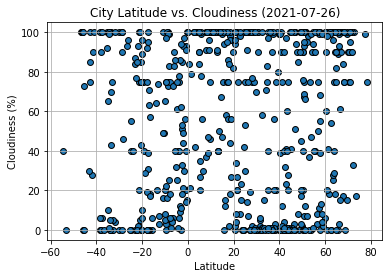

In [13]:
scatter("Cloudiness","Cloudiness")

* Latitude vs. Cloudiness Plot shows that the Cloudiness can be predicted based only on Latitude

## Latitude vs. Wind Speed Plot

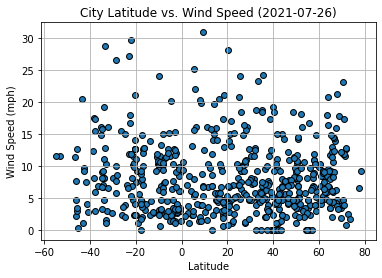

In [14]:
scatter("Wind Speed", "Wind Speed")

* Latitude vs. Wind Speed Plot shows that the Highest Wind Speed measurements slightly tends to lower towards South and North Poles
* Lower Wind Speed values density is being observed in -20:60 range of Latitude values

## Linear Regression

In [15]:
# Add function that calculates linear regreassion

# Calculate correlation usong scipy pearsonr method
def correlation(var1, var2):
    r_value = st.pearsonr(var1, var2)
    print(f"The r-value is {round(r_value[0],2)}")
    return r_value

# Calculate linear regression equation
def regression(var1, var2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(var1, var2)
    regress_values = var1 * slope + intercept
    return regress_values

# Plot scatter chart and linear regreassion
def scatter_plot(dataFrame, x_value, y_value, regrX_values, regrY_values, x_label, y_label):
    plot = dataFrame.plot.scatter(x = x_value, y = y_value, s=40)
    plot.set_title(f"Linear Regression Model btw {y_label} and {x_label}")
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plt.plot(regrX_values,regrY_values,"r-")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.59


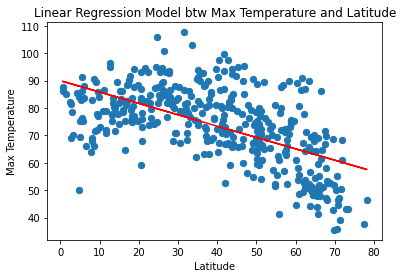

In [16]:
# Define Northern Hemisphere
north_hem = clean_df.loc[clean_df["Lat"]>=0]

north_lat = north_hem["Lat"]
north_max_temp = north_hem["Max Temp"]

correlation(north_lat, north_max_temp)

scatter_plot(north_hem, "Lat", "Max Temp", north_lat,
             regression(north_lat, north_max_temp), "Latitude", "Max Temperature")

* There is a strong negative correlation between Max Temp and Latitude in Northern Hemisphere.
* That means that the more to the North the city is the less Max Temp it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.76


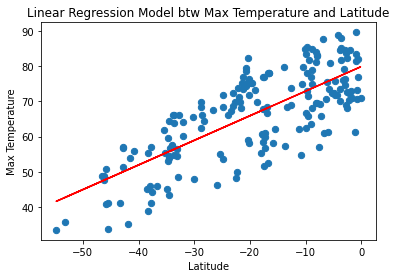

In [18]:
# Define Southern Hemisphere
south_hem = clean_df.loc[clean_df["Lat"]<=0]

south_lat = south_hem["Lat"]
south_max_temp = south_hem["Max Temp"]

correlation(south_lat, south_max_temp)

scatter_plot(south_hem, "Lat", "Max Temp", south_lat,
             regression(south_lat, south_max_temp), "Latitude", "Max Temperature")

* There is a strong positive correlation between Max Temp and Latitude in Southern Hemisphere.
* This means that the closer the city is to the Equator the greater Max Temp it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.1


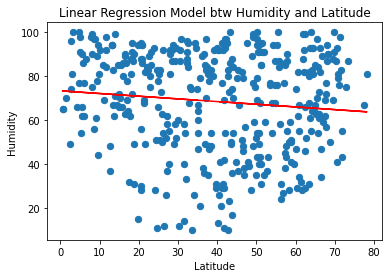

In [19]:
north_humidity = north_hem["Humidity"]

correlation(north_lat, north_humidity)

scatter_plot(north_hem, "Lat", "Humidity", north_lat,
             regression(north_lat, north_humidity), "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.02


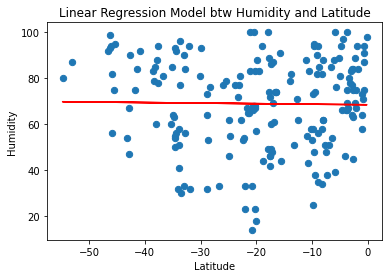

In [20]:
south_humidity = south_hem["Humidity"]

correlation(south_lat, south_humidity)

scatter_plot(south_hem, "Lat", "Humidity", south_lat,
             regression(south_lat, south_humidity), "Latitude", "Humidity")

* Linear Regression Model for Humidity vs Latitude for both Henispheres shows that there is almost no correlation (close to zero) between these two parameters
* Humidity levels can not be predicted by knowing latitudes of cities

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.01


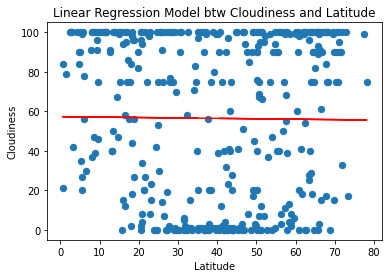

In [21]:
north_cloud = north_hem["Cloudiness"]

correlation(north_lat, north_cloud)

scatter_plot(north_hem, "Lat", "Cloudiness", north_lat,
             regression(north_lat, north_cloud), "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.09


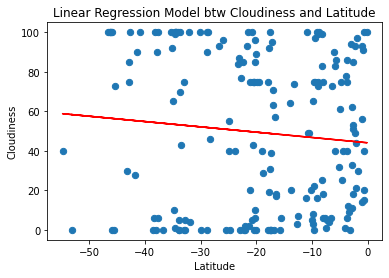

In [22]:
south_cloud = south_hem["Cloudiness"]

correlation(south_lat, south_cloud)

scatter_plot(south_hem, "Lat", "Cloudiness", south_lat,
             regression(south_lat, south_cloud), "Latitude", "Cloudiness")

* Linear Regreassion model does not explain the relationship between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.03


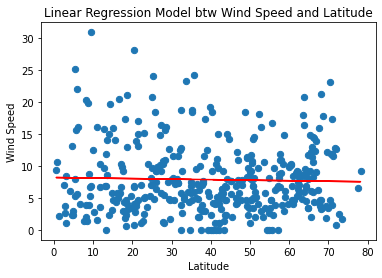

In [24]:
north_wind = north_hem["Wind Speed"]

correlation(north_lat, north_wind)

scatter_plot(north_hem, "Lat", "Wind Speed", north_lat,
             regression(north_lat, north_wind), "Latitude", "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.14


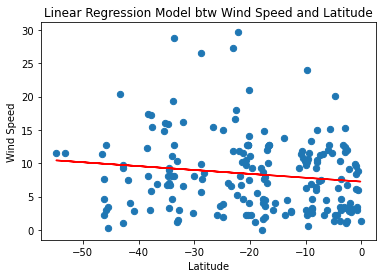

In [25]:
south_wind = south_hem["Wind Speed"]

correlation(south_lat, south_wind)

scatter_plot(south_hem, "Lat", "Wind Speed", south_lat,
             regression(south_lat, south_wind), "Latitude", "Wind Speed")

* There is some dependency between Wind Speed and Latitude, but it is week to say that there is a reliable correlation
* For Southern Hemisphere the r-value is slighlty more significant (-0.14) than for Northern (-0.03), and can maybe explain the density of lower wind speed values near Equator